# 3. MNIST 데이터셋을 로드하고 훈련세트와 테스트세트로 분할하겠습니다.

# 모듈 설정 및 데이터 불러오기

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# MNIST 불러오기
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

# 훈련세트와 테스트세트로 분할

In [2]:
# 첫 60000개는 훈련을 위한 샘플, 나머지 10000개는 테스트용으로 분할
X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]

X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

## 3.1 이 데이터셋을 랜덤 포레스트 분류기로 훈련시키고 시간이 얼마나 오래걸리는지 시간을 잰 후, 테스트 세트로 만들어진 모델의 정확도를 평가합니다.

In [3]:
# 랜덤포레스트로 훈련시키는 코드
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [4]:
# 훈련 시간을 재는 코드입니다.
import time

t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()

print("훈련 시간: {:.2f}s".format(t1 - t0))

훈련 시간: 43.65s


In [5]:
# 정확도 평가 코드입니다.
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9705

## 3.2 문제 : 데이터셋을 PCA를 사용해 설명된 분산이 95%가 되도록 차원을 축소하세요

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

## 3.3 문제 : 이 축소된 데이터셋에 위와 같이 새로운 랜덤포레스트 분류기를 훈련시키고 얼마나 오래걸리는지 확인합니다. 훈련 시간이 빨라졌나요?

In [7]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [8]:
t0 = time.time()
rnd_clf.fit(X_reduced, y_train)
t1 = time.time()

print("훈련 시간: {:.2f}s".format(t1 - t0))

훈련 시간: 115.01s


=> 훈련 시간이 115.01s로 느려졌다.

## 3.4 문제: 테스트 세트에서 이 분류기의 정확도를 평가해보세요. 이전 분류기와 비교해서 어떤가요?

In [9]:
from sklearn.metrics import accuracy_score

X_test_reduced = pca.transform(X_test)
y_pred = rnd_clf.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9481

=> 정확도가 0.9481로 조금 줄어들었다.

## 3.5 소프트 맥스 회귀를 사용해서도 같은 방식으로 실험을 해봅니다.

LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
* multi_class="multinomial" 
  * 각 클래스에 대한 softmax 확률값, 크로스 엔트로피 계산을 통해 one-hot 타켓 벡터를 생성하는 식으로 다중분류를 수행.
* solver="lbfgs" 
  * 최적화에 사용할 알고리즘 설정.

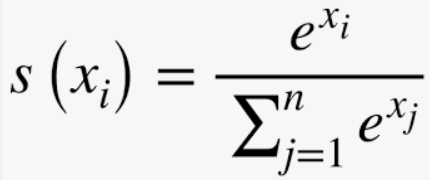

In [10]:
# 차원축소 이전의 코드
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [11]:
print("훈련 시간: {:.2f}s".format(t1 - t0))

훈련 시간: 30.23s


In [12]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9255

## 3.6 문제 : 3.2에서 축소된 데이터 셋을 사용해 소프트맥스 회귀모델을 훈련시켜보세요. 그리고 훈련시간을 확인하세요

In [13]:
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf.fit(X_reduced, y_train)
t1 = time.time()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [14]:
print("훈련 시간: {:.2f}s".format(t1 - t0))

훈련 시간: 10.62s


## 3.7 문제 : 모델의 정확도도 확인해보세요

In [15]:
y_pred = log_clf.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9201

## 3.8 문제 : 랜덤포레스트 모형의 훈련시간과 정확도, 소프트맥스 모형의 훈련시간과 정확도를 비교해보세요.

<랜덤포레스트 모형>
- 원본 데이터: 훈련 시간: 42.83s / 정확도: 0.9705
- 차원 축소 데이터: 훈련 시간: 115.01s / 정확도: 0.9481

=> 훈련 시간이 늘어나고, 정확도가 떨어진다.

<소프트맥스 모형>
- 원본 데이터: 훈련 시간 30.23s / 정확도: 0.9255 
- 차원 축소 데이터: 훈련 시간 10.62s / 정확도: 0.9201

=> 훈련 시간이 줄어들고, 정확도가 떨어진다.

=> 즉, 차원축소로 인한 속도 향상의 대가로, 성능이 조금 감소함을 알 수 있다.